<center><h1>Erkang_Chen_Final Project</h1></center>

## Library

In [245]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
import seaborn as sns

## Analysing individual Performance in the team 

### For Batters 

In [140]:
df = pd.read_csv("LAD_batting.csv")

X1 = df[["G", "PA", "H", "2B", "3B", "HR", "BB","SO","BA"]].head(9)
X2 = df[["G", "PA", "H", "2B", "3B", "HR", "BB","SO","BA"]][10:22]
y1 = df["OPS"].head(9)
y2 = df["OPS"][10:22]

X = pd.concat([X1, X2], axis=0)

y = pd.concat([y1, y2], axis=0)

Mean Squared Error: 0.14923204481999994


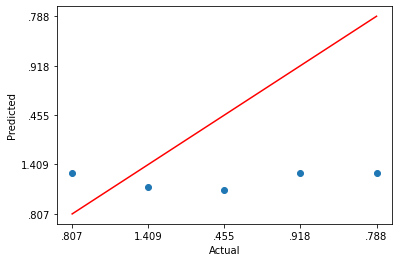

In [141]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

plt.scatter(y_test, y_pred)
plt.plot(y_test.values, y_test.values, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [142]:
df = pd.read_csv("LAD_batting.csv")

X1 = df[["G", "PA", "H", "2B", "3B", "HR", "BB","SO","BA"]].head(9)
X2 = df[["G", "PA", "H", "2B", "3B", "HR", "BB","SO","BA"]][10:22]
y1 = df["OPS"].head(9)
y2 = df["OPS"][10:22]

X = pd.concat([X1, X2], axis=0)
y = pd.concat([y1, y2], axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Extract the feature importances from the model
importances = model.feature_importances_

indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. BB (0.282673)
2. HR (0.191576)
3. G (0.133917)
4. BA (0.126580)
5. PA (0.123256)
6. SO (0.063001)
7. H (0.056651)
8. 2B (0.011609)
9. 3B (0.010737)


In [147]:
X1 = df[["Name","G", "PA", "H", "2B", "3B", "HR", "BB","SO","BA"]].head(9)
X2 = df[["Name","G", "PA", "H", "2B", "3B", "HR", "BB","SO","BA"]][10:22]
y1 = df["OPS"].head(9)
y2 = df["OPS"][10:22]
batter_infor = pd.concat([X1, X2], axis=0)
batter_infor.reset_index(drop=True, inplace=True)
batter_infor["HR"] = pd.to_numeric(batter_infor["HR"])
batter_infor["BB"] = pd.to_numeric(batter_infor["BB"])
batter_infor["PA"] = pd.to_numeric(batter_infor["PA"])
batter_infor["H"] = pd.to_numeric(batter_infor["H"])
batter_infor["G"] = pd.to_numeric(batter_infor["G"])
batter_infor["BA"] = pd.to_numeric(batter_infor["BA"])
batter_infor["HR_score"] = batter_infor["HR"] * 0.191576
batter_infor["BA_score"] = batter_infor["BA"] * 0.126580
batter_infor["BB_score"] = batter_infor["BB"] * 0.282673
batter_infor["PA_score"] = batter_infor["PA"] * 0.123256
batter_infor["H_score"] = batter_infor["H"] * 0.056651
batter_infor["G_score"] = batter_infor["G"] * 0.133917
batter_infor["Total_score"] = batter_infor[["HR_score", "BB_score", "PA_score", "H_score", "G_score"]].sum(axis=1)
batter_infor = batter_infor.round({'HR_score': 2, 'BB_score': 2, 'PA_score': 2, 'H_score': 2, 'G_score': 2, 'Total_score': 2})

In [278]:
batter_infor = batter_infor.sort_values("Total_score", ascending=False).reset_index(drop=True)
batter_infor

,Name,G,PA,H,2B,3B,HR,BB,SO,BA,HR_score,BA_score,BB_score,PA_score,H_score,G_score,Total_score
0,Freddie Freeman*,159,708,199,47,2,21,84,102,0.325,4.02,0.041139,23.74,87.27,11.27,21.29,147.60
1,Trea Turner,160,708,194,39,4,21,45,131,0.298,4.02,0.037721,12.72,87.27,10.99,21.43,136.43
2,Mookie Betts,142,639,154,40,3,35,55,104,0.269,6.71,0.034050,15.55,78.76,8.72,19.02,128.75
3,Max Muncy*,136,565,91,22,1,21,90,141,0.196,4.02,0.024810,25.44,69.64,5.16,18.21,122.47
4,Will Smith,137,578,132,26,3,24,56,96,0.260,4.60,0.032911,15.83,71.24,7.48,18.35,117.49
5,Cody Bellinger*,144,550,106,27,3,19,38,150,0.210,3.64,0.026582,10.74,67.79,6.01,19.28,107.46
6,Justin Turner,128,532,130,36,0,13,50,89,0.278,2.49,0.035189,14.13,65.57,7.36,17.14,106.70
7,Gavin Lux*,129,471,116,20,7,6,47,95,0.276,1.15,0.034936,13.29,58.05,6.57,17.28,96.34
8,Chris Taylor,118,454,89,25,3,10,44,160,0.221,1.92,0.027974,12.44,55.96,5.04,15.80,91.16
9,Trayce Thompson,74,239,55,14,1,13,30,86,0.268,2.49,0.033923,8.48,29.46,3.12,9.91,53.45


### For Pitchers

In [165]:
df_p = pd.read_csv("LAD_pitching.csv")

X1 = df_p[["W", "IP", "BB", "SO", "ER", "HR", "BF"]].head(6)
X2 = df_p[["W", "IP", "BB", "SO", "ER", "HR", "BF"]][8:12]
y1 = df_p["ERA"].head(6)
y2 = df_p["ERA"][8:12]

X = pd.concat([X1, X2], axis=0)

y = pd.concat([y1, y2], axis=0)

Mean Squared Error: 0.3094161849999963


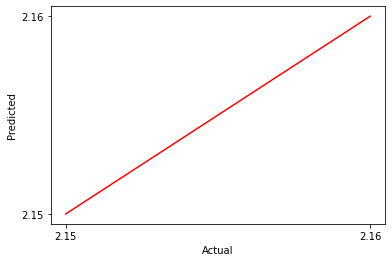

In [166]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

plt.scatter(y_test, y_pred)
plt.plot(y_test.values, y_test.values, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [167]:
df = pd.read_csv("LAD_batting.csv")

X1 = df_p[["W", "IP", "BB", "SO", "ER", "HR", "BF"]].head(6)
X2 = df_p[["W", "IP", "BB", "SO", "ER", "HR", "BF"]][8:12]
y1 = df_p["ERA"].head(6)
y2 = df_p["ERA"][8:12]

X = pd.concat([X1, X2], axis=0)
y = pd.concat([y1, y2], axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Extract the feature importances from the model
importances = model.feature_importances_

indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. W (0.302221)
2. SO (0.154164)
3. IP (0.139913)
4. BB (0.116023)
5. ER (0.110453)
6. HR (0.107627)
7. BF (0.069599)


In [171]:
X1 = df_p[["Name","W", "IP", "BB", "SO", "ER", "HR", "BF"]].head(6)
X2 = df_p[["Name","W", "IP", "BB", "SO", "ER", "HR", "BF"]][8:12]
y1 = df_p["ERA"].head(6)
y2 = df_p["ERA"][8:12]
pitcher_infor = pd.concat([X1, X2], axis=0)
pitcher_infor.reset_index(drop=True, inplace=True)
pitcher_infor["W"] = pd.to_numeric(pitcher_infor["W"])
pitcher_infor["SO"] = pd.to_numeric(pitcher_infor["SO"])
pitcher_infor["IP"] = pd.to_numeric(pitcher_infor["IP"])
pitcher_infor["BB"] = pd.to_numeric(pitcher_infor["BB"])
pitcher_infor["ER"] = pd.to_numeric(pitcher_infor["ER"])
pitcher_infor["HR"] = pd.to_numeric(pitcher_infor["HR"])
pitcher_infor["BF"] = pd.to_numeric(pitcher_infor["BF"])
pitcher_infor["W_score"] = pitcher_infor["W"] * 0.302221
pitcher_infor["SO_score"] = pitcher_infor["SO"] * 0.154164
pitcher_infor["IP_score"] = pitcher_infor["IP"] * 0.139913
pitcher_infor["BB_score"] = pitcher_infor["BB"] * 0.116023
pitcher_infor["ER_score"] = pitcher_infor["ER"] *0.110453
pitcher_infor["HR_score"] = pitcher_infor["HR"] * 0.107627
pitcher_infor["BF_score"] = pitcher_infor["BF"] * 0.069599
pitcher_infor["Total_score"] = pitcher_infor[["W_score", "IP_score", "BB_score", "ER_score", "HR_score","BF_score"]].sum(axis=1)
pitcher_infor = pitcher_infor.round({"W_score":2, "IP_score":2, "BB_score":2, "ER_score":2, "HR_score":2,"BF_score":2})

In [172]:
pitcher_infor

,Name,W,IP,BB,SO,ER,HR,BF,W_score,SO_score,IP_score,BB_score,ER_score,HR_score,BF_score,Total_score
0,Tyler Anderson*,15,178.2,34,138,51,14,707,4.53,21.274632,24.93,3.94,5.63,1.51,49.21,89.756968
1,Julio Urías*,17,175.0,41,166,42,23,689,5.14,25.591224,24.48,4.76,4.64,2.48,47.95,89.447633
2,Tony Gonsolin,16,130.1,35,119,31,11,498,4.84,18.345516,18.20,4.06,3.42,1.18,34.66,66.367264
3,Clayton Kershaw*,12,126.1,23,137,32,10,493,3.63,21.120468,17.64,2.67,3.53,1.08,34.31,62.861283
4,Andrew Heaney*,4,72.2,19,110,25,14,310,1.21,16.958040,10.10,2.20,2.76,1.51,21.58,39.358833
5,Walker Buehler,6,65.0,17,58,29,8,274,1.81,8.941512,9.09,1.97,3.20,0.86,19.07,36.014341
6,Evan Phillips,7,63.0,15,77,8,2,233,2.12,11.870628,8.81,1.74,0.88,0.22,16.22,29.985856
7,Phil Bickford,2,61.0,14,67,32,12,247,0.60,10.328988,8.53,1.62,3.53,1.29,17.19,32.780430
8,Alex Vesia*,5,54.1,24,79,13,2,227,1.51,12.178956,7.57,2.78,1.44,0.22,15.80,29.315066
9,Brusdar Graterol,2,49.2,10,43,18,3,197,0.60,6.629052,6.88,1.16,1.99,0.32,13.71,24.670430


In [173]:
pitcher_infor = pitcher_infor.sort_values("Total_score", ascending=False).reset_index(drop=True)
pitcher_infor

,Name,W,IP,BB,SO,ER,HR,BF,W_score,SO_score,IP_score,BB_score,ER_score,HR_score,BF_score,Total_score
0,Tyler Anderson*,15,178.2,34,138,51,14,707,4.53,21.274632,24.93,3.94,5.63,1.51,49.21,89.756968
1,Julio Urías*,17,175.0,41,166,42,23,689,5.14,25.591224,24.48,4.76,4.64,2.48,47.95,89.447633
2,Tony Gonsolin,16,130.1,35,119,31,11,498,4.84,18.345516,18.20,4.06,3.42,1.18,34.66,66.367264
3,Clayton Kershaw*,12,126.1,23,137,32,10,493,3.63,21.120468,17.64,2.67,3.53,1.08,34.31,62.861283
4,Andrew Heaney*,4,72.2,19,110,25,14,310,1.21,16.958040,10.10,2.20,2.76,1.51,21.58,39.358833
5,Walker Buehler,6,65.0,17,58,29,8,274,1.81,8.941512,9.09,1.97,3.20,0.86,19.07,36.014341
6,Phil Bickford,2,61.0,14,67,32,12,247,0.60,10.328988,8.53,1.62,3.53,1.29,17.19,32.780430
7,Evan Phillips,7,63.0,15,77,8,2,233,2.12,11.870628,8.81,1.74,0.88,0.22,16.22,29.985856
8,Alex Vesia*,5,54.1,24,79,13,2,227,1.51,12.178956,7.57,2.78,1.44,0.22,15.80,29.315066
9,Brusdar Graterol,2,49.2,10,43,18,3,197,0.60,6.629052,6.88,1.16,1.99,0.32,13.71,24.670430


# Dodgers team performance in 2022 and throughout the 10 seasons (API sources)

## Batting performance

In [280]:
team_df = pd.read_csv("mlb_team_batting_data_2012-2022.csv")
team_df_2022 = team_df[team_df['Year'] == 2022]
team_df_2022.reset_index(drop = True, inplace = True)

Mean squared error: 55.39


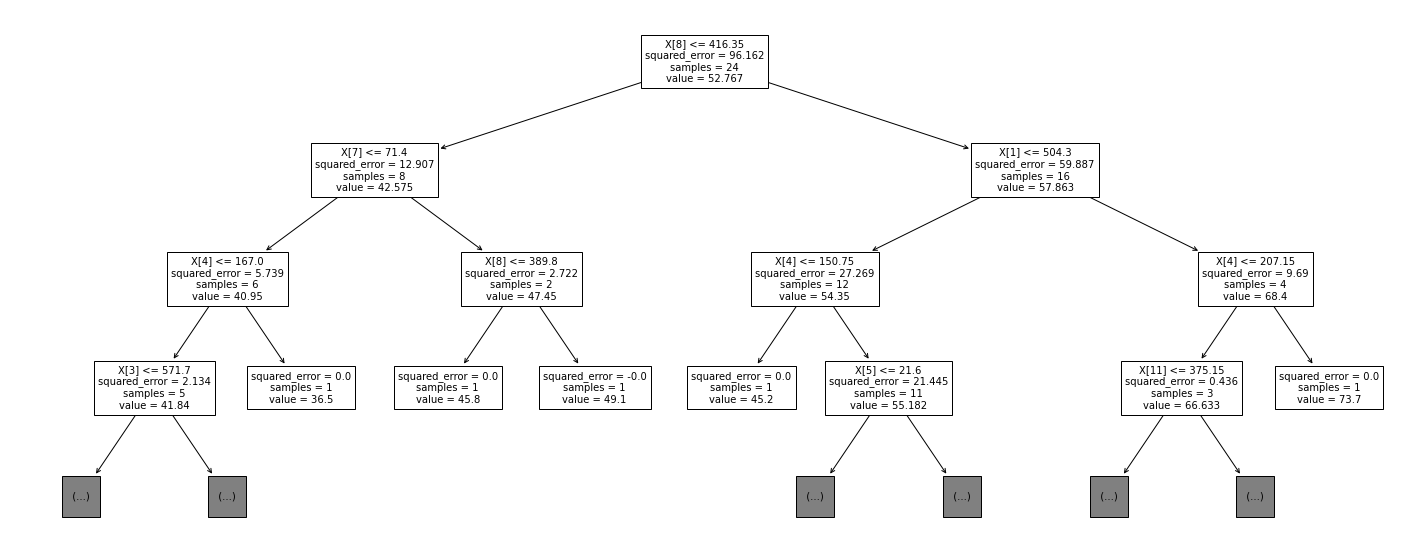

In [281]:
X = team_df_2022[['At bats', 'Runs', 'Hits', 'Singles', 'Doubles', 'Triples', 'Home runs', 'Stolen bases', 'Runs batted in', 'Outs', 'Strikeouts', 'Walks']]
y = team_df_2022['Wins']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("Mean squared error: {:.2f}".format(mse))
fig, ax = plt.subplots(figsize=(25, 10)) 
plot_tree(model, ax=ax, fontsize=10, max_depth=3) 
plt.show()

In [291]:
team_df = pd.read_csv("mlb_team_pitching_data_2012-2022.csv")
team_df_2022_pitching = team_df[team_df['Year'] == 2022]
team_df_2022_pitching.reset_index(drop=True, inplace=True)
team_df_2022_sorted = team_df_2022_pitching.sort_values('Hits allowed', ascending=False)
team_df_2022_sorted.reset_index(drop=True, inplace=True)
team_df_2022_sorted

,Team,Innings pitched,Earned runs,Hits allowed,Wins,Walks allowed,Strikeouts pitched,Year
0,COL,946.2,533.9,1006.6,45.2,1.5,788.2,2022
1,KC,940.2,492.7,991.4,43.2,1.6,790.8,2022
2,WSH,936.9,521.2,975.4,36.5,1.6,810.1,2022
3,PIT,943.5,488.7,950.8,41.2,1.6,830.0,2022
4,BOS,950.2,478.7,936.9,51.8,1.5,893.7,2022
5,BAL,951.5,420.3,933.6,55.1,1.2,806.1,2022
6,SF,951.5,408.4,927.6,53.8,1.2,909.7,2022
7,OAK,946.9,477.4,925.6,39.8,1.4,798.8,2022
8,CIN,944.9,510.6,907.0,41.2,1.7,938.9,2022
9,TOR,956.8,413.7,900.4,61.1,1.2,923.0,2022


Mean squared error: 27.25


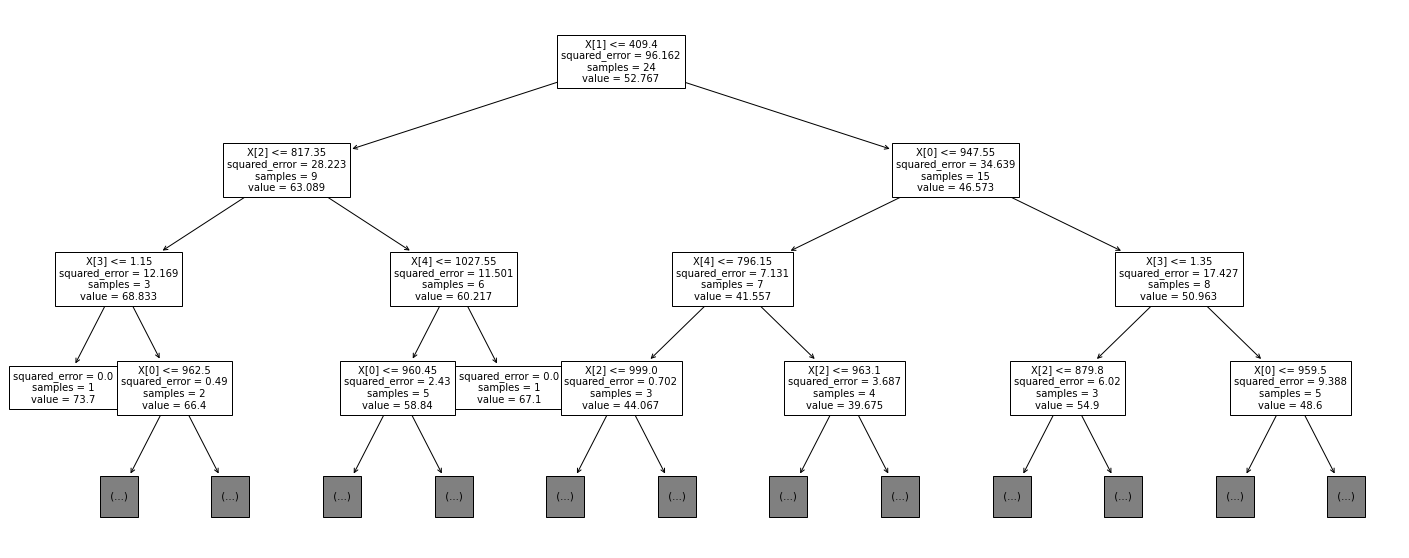

In [206]:
X = team_df_2022_pitching[['Innings pitched','Earned runs','Hits allowed','Walks allowed','Strikeouts pitched']]
y = team_df_2022_pitching['Wins']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree regressor model
model = DecisionTreeRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("Mean squared error: {:.2f}".format(mse))
fig, ax = plt.subplots(figsize=(25, 10))
plot_tree(model, ax=ax, fontsize=10, max_depth=3) 
plt.show()

In [219]:
team_df_p = pd.read_csv("mlb_team_pitching_data_2012-2022.csv")
team_df_LAD_p = team_df_p[team_df_p['Team'] == 'LAD']
team_df_LAD_p.reset_index(drop=True, inplace=True)
team_df_LAD_p

,Team,Innings pitched,Earned runs,Hits allowed,Wins,Walks allowed,Strikeouts pitched,Year
0,LAD,2001.1,745.7,1763.5,118.8,6.4,1762.2,2012
1,LAD,2167.8,783.4,1974.9,137.5,6.4,1931.5,2013
2,LAD,1563.6,591.7,1429.0,100.4,3.0,1466.4,2014
3,LAD,421.9,163.5,385.4,26.9,0.2,407.6,2015
4,LAD,1120.3,461.1,976.1,70.2,1.7,1164.2,2016
5,LAD,947.3,356.2,804.3,68.2,1.2,1016.1,2017
6,LAD,2160.9,815.4,1872.5,134.7,5.5,2291.2,2018
7,LAD,1588.1,599.0,1319.9,116.5,2.9,1669.4,2019
8,LAD,197.4,66.4,155.6,15.8,0.3,189.7,2020
9,LAD,1010.6,340.3,770.5,73.8,1.5,1112.9,2021


## Analyze Los Angeles Dodgers consistency throughout last ten seasons

In [240]:
team_df_b = pd.read_csv("mlb_team_batting_data_2012-2022.csv")
team_df_LAD_b = team_df_b[team_df_b['Team'] == 'LAD']
team_df_LAD_b.reset_index(drop=True, inplace=True)
team_df_LAD_b_copy = team_df_LAD_b.copy()
team_df_LAD_b_copy.drop(["Year", "Team", "Wins"], axis=1, inplace=True)

In [241]:
team_df_LAD = pd.concat([team_df_LAD_b_copy, team_df_LAD_p], axis=1)

In [242]:
team_df_LAD

,At bats,Runs,Hits,Singles,Doubles,Triples,Home runs,Stolen bases,Runs batted in,Outs,Strikeouts,Walks,Team,Innings pitched,Earned runs,Hits allowed,Wins,Walks allowed,Strikeouts pitched,Year
0,7509.9,879.7,1890.6,1327.1,371.5,31.8,160.2,143.6,838.3,5619.3,1596.4,664.3,LAD,2001.1,745.7,1763.5,118.8,6.4,1762.2,2012
1,8209.0,970.3,2161.8,1510.0,420.1,25.4,206.3,116.6,923.9,6047.3,1713.3,711.6,LAD,2167.8,783.4,1974.9,137.5,6.4,1931.5,2013
2,5938.1,766.8,1576.4,1070.1,322.5,40.6,143.1,147.4,732.6,4361.7,1330.7,554.3,LAD,1563.6,591.7,1429.0,100.4,3.0,1466.4,2014
3,1572.7,194.8,392.4,252.0,78.0,2.3,54.6,17.5,186.3,1180.3,367.3,164.4,LAD,421.9,163.5,385.4,26.9,0.2,407.6,2015
4,4254.4,559.0,1060.9,689.3,209.7,16.2,145.7,34.7,524.3,3193.5,1018.5,404.8,LAD,1120.3,461.1,976.1,70.2,1.7,1164.2,2016
5,3547.6,505.1,884.9,520.9,206.0,13.1,145.0,50.5,478.9,2662.7,905.3,425.7,LAD,947.3,356.2,804.3,68.2,1.2,1016.1,2017
6,8157.4,1177.1,2040.8,1215.1,433.3,48.3,344.0,109.8,1106.8,6116.6,2102.3,947.2,LAD,2160.9,815.4,1872.5,134.7,5.5,2291.2,2018
7,6036.8,973.7,1554.0,893.5,331.9,22.0,306.6,62.6,946.2,4482.8,1490.2,667.1,LAD,1588.1,599.0,1319.9,116.5,2.9,1669.4,2019
8,749.4,128.1,191.9,110.8,35.6,0.8,43.3,10.6,120.0,557.5,172.9,83.7,LAD,197.4,66.4,155.6,15.8,0.3,189.7,2020
9,3789.7,577.7,925.7,572.1,171.9,16.7,165.0,45.2,556.1,2864.0,980.0,426.6,LAD,1010.6,340.3,770.5,73.8,1.5,1112.9,2021


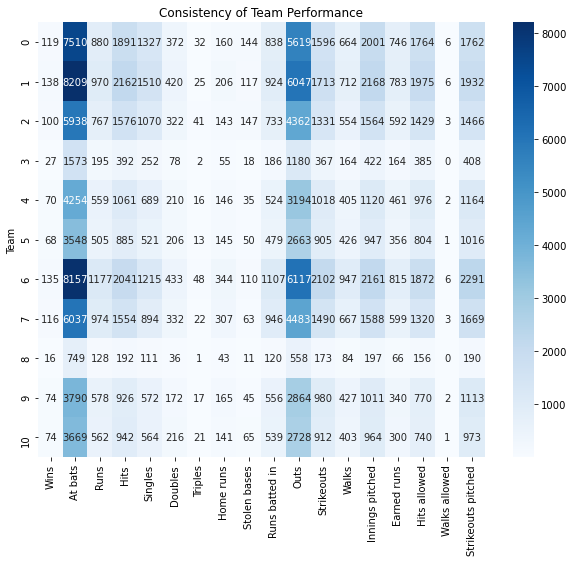

In [248]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(team_df_LAD, cmap='Blues', annot=True, fmt='.0f')
plt.title('Consistency of Team Performance')
plt.ylabel('Team')
plt.show()

# Analyze individual players contribution to the team success.(Fangraph.com)

In [273]:
player_df_b = pd.read_csv('MLB_team_batting_data.csv')

In [270]:
df_player_b = pd.concat([player_df_b[player_df_b['Name'] == 'Freddie Freeman'],
                player_df_b[player_df_b['Name'] == 'Mookie Betts'],
                player_df_b[player_df_b['Name'] == 'Trea Turner'],
                player_df_b[player_df_b['Name'] == 'Max Muncy']])

df_player_b

,Name,Team,G,PA,HR,R,RBI,SB,BB%,K%,...,AVG,OBP,SLG,wOBA,xwOBA,wRC+,BsR,Off,Def,WAR
4,Freddie Freeman,LAD,159,708,21,117,100,13,11.9%,14.4%,...,0.325,0.407,0.511,0.393,0.403,157.0,5.4,52.6,-8.8,7.1
8,Mookie Betts,LAD,142,639,35,117,82,12,8.6%,16.3%,...,0.269,0.340,0.533,0.373,0.344,144.0,4.3,37.2,3.5,6.5
11,Trea Turner,LAD,160,708,21,101,100,27,6.4%,18.5%,...,0.298,0.343,0.466,0.350,0.335,128.0,6.5,29.5,7.1,6.3
98,Max Muncy,LAD,136,565,21,69,69,2,15.9%,25.0%,...,0.196,0.329,0.384,0.318,0.339,106.0,2.1,6.3,-2.8,2.4


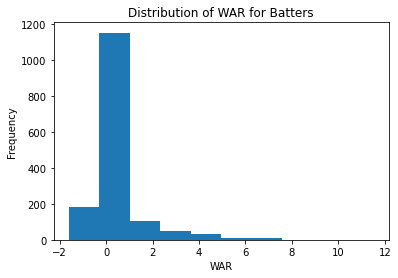

In [292]:
import matplotlib.pyplot as plt

# Create a histogram of WAR values
plt.hist(player_df_b['WAR'], bins=10)

plt.title('Distribution of WAR for Batters')
plt.xlabel('WAR')
plt.ylabel('Frequency')

plt.show()

In [274]:
player_df_p = pd.read_csv('MLB_team_pitching_data.csv')

In [294]:
df_player_p = pd.concat([player_df_p[player_df_p['Name'] == 'Tyler Anderson'],
                         player_df_p[player_df_p['Name'] == 'Julio Urias']])
df_player_p 

,Name,Team,W,L,SV,G,GS,IP,K/9,BB/9,...,BIP,LOB%,GB%,HR/FB,vFA (pi),ERA,xERA,FIP,xFIP,WAR
15,Tyler Anderson,LAD,15,5,0,30,28,178.2,6.95,1.71,...,0.256,77.8%,40.1%,6.4%,90.7,2.57,3.10,3.31,4.10,4.0
23,Julio Urias,LAD,17,7,0,31,31,175.0,8.54,2.11,...,0.229,86.6%,39.7%,10.8%,93.1,2.16,2.81,3.71,3.81,3.2


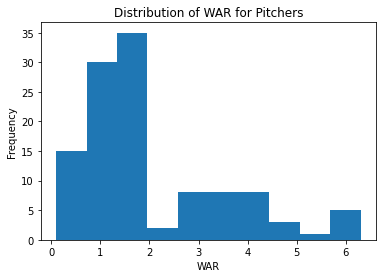

In [293]:
import matplotlib.pyplot as plt

# Create a histogram of WAR values
plt.hist(player_df_p['WAR'], bins=10)

plt.title('Distribution of WAR for Pitchers')
plt.xlabel('WAR')
plt.ylabel('Frequency')

plt.show()